# 1. Perkenalan

Nama : Rizqi Golda

Batch : FTDS-018-RMT

Dataset : Harga pada aplikasi berbasis `ride hailing`

Objective : Menurut laporan dari `Brett Helling` di (https://www.ridester.com/surge-pricing/), ada beberapa kondisi dimana biaya pemakaian aplikasi berbasis `ride hailing` meningkat, antara lain `rush hour` dan `bad weather`. dalam dataset yang digunakan pada kali ini, terdapat beberapa kodisi saat aplikasi berbasis `ride hailing` digunakan. Project kali ini bertujuan untuk memprediksi biaya yang perlu dikeluarkan konsumen sehingga konsumen dapat memperkirakan berapa yang ia perlu keluarkan guna berpergian menggunakan aplikasi tersebut.

# 2. Import library

memasukkan semua library yang diperlukan selama proses `machine learning`

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import json

# 3. Data loading

mengambil data yang diperlukan dari `https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma`.

In [135]:
dataSheet = pd.read_csv('file:///home/ubuntu/Downloads/rideshare_kaggle.csv')

membaca data `CSV`

In [136]:
df = dataSheet.copy()

men-duplikat datasheer supaya datanya tidak rusak selama kegiatan berlangsung

In [137]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


menampilkan datasheet yang diperlukan

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

mengecek informasi sederhana dari datasheet tersebut.

In [139]:
df.isnull().mean()

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          0.079494
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


mengecek data yang hilang pada datasheet tersebut.

# 4. EDA

melakukan explorasi sederhana pada datasheet yang telah didapat guna mengetahui gambaran singkat pada data tersebut.

## Histogram of price 

Text(0.5, 1.0, 'Histogram of price')

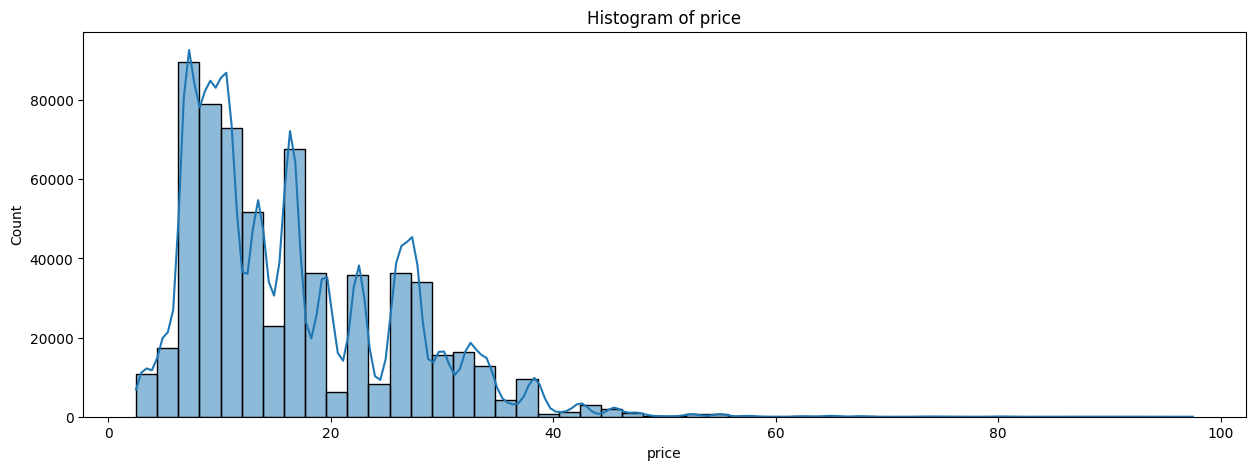

In [140]:
plt.figure(figsize=(15, 5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Histogram of price')

melihat histogram dari intensitas biaya yang dikeluarkan. jadi, frekuensi persebaran data harga pada datasheet diatas diketahui bahwa persebaran tertingginya berada dikisaran 6$. rentang harga yang tercatat dari data tersebut berkisar dari 2$ sampai lebih dari 95$ dalam sekali pemakaian.

## price skewness

In [141]:
df['price'].skew()

1.0457470560899256

melihat kemiringan dari data `biaya` yang dibayarkan oleh konsumen disetiap kali menggunakan aplikasi. `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai positif lebih dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kekanan. bila diartikan dalam tabel berikut, maka kesimpulan yang didapatkan ialah "persebaran data `biaya` pada datasheet yang diatas memiliki catatan bahwa terdapat konsumen yang memakai aplikasi berbasis `ride hailing` yang membayar lebih dari 95$ untuk sekali pemakaian walaupun intensitasnya rendah".

## histogram of distance

Text(0.5, 1.0, 'Histogram of distance')

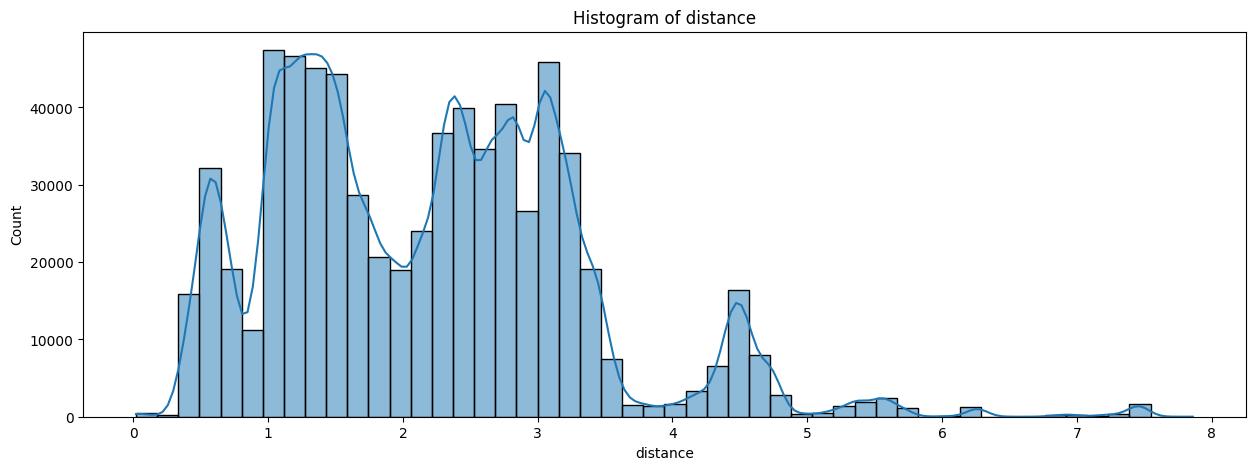

In [142]:
plt.figure(figsize=(15, 5))
sns.histplot(df['distance'], kde=True, bins=50)
plt.title('Histogram of distance')

melihat intensitas jarak yang ditempuh konsumen setiap kali menggunakan aplikasi. jadi, frekuensi persebaran data jarak perjalanan pada datasheet diatas diketahui bahwa persebaran tertingginya berada dikisaran jarak 1 mil. rentang jarak yang tercatat dari data tersebut berkisar dari dibawah 1 mil sampai lebih dari 7,5 mil dalam sekali perjalanan.

## distance skewness

In [143]:
df['distance'].skew()

0.8343950077972692

melihat kemiringan dari data jarak yang ditempuh oleh konsumen disetiap kali menggunakan aplikasi. `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai positif lebih dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kekanan. bila diartikan dalam tabel berikut, maka kesimpulan yang didapatkan ialah "persebaran data jarak pada datasheet yang diatas memiliki catatan bahwa terdapat konsumen yang memakai aplikasi berbasis `ride hailing` ini untuk menempuh jarak lebih dari 7 mil dengan intensitas yang rendah".

## hour uniqueness

melihat pada jam berapa saja aplikasi digunakan oleh konsumen.

In [144]:
df['hour'].value_counts()

0     32413
23    31931
16    30384
17    30384
12    30384
13    30384
18    30384
11    30384
14    30384
10    30384
15    30383
22    29436
9     28971
2     28548
1     28548
4     28330
3     27815
21    27732
19    27555
6     27336
20    26782
5     25008
7     24936
8     24275
Name: hour, dtype: int64

dari data diatas, terlihat bahwa penggunaan aplikasi `ride hailing` paling banyak tercatat di jam 12 malam dan yang paling rendah di jam 8 pagi. 

## Histogram of hour

melihat histogram jamnya.

Text(0.5, 1.0, 'Histogram of hour')

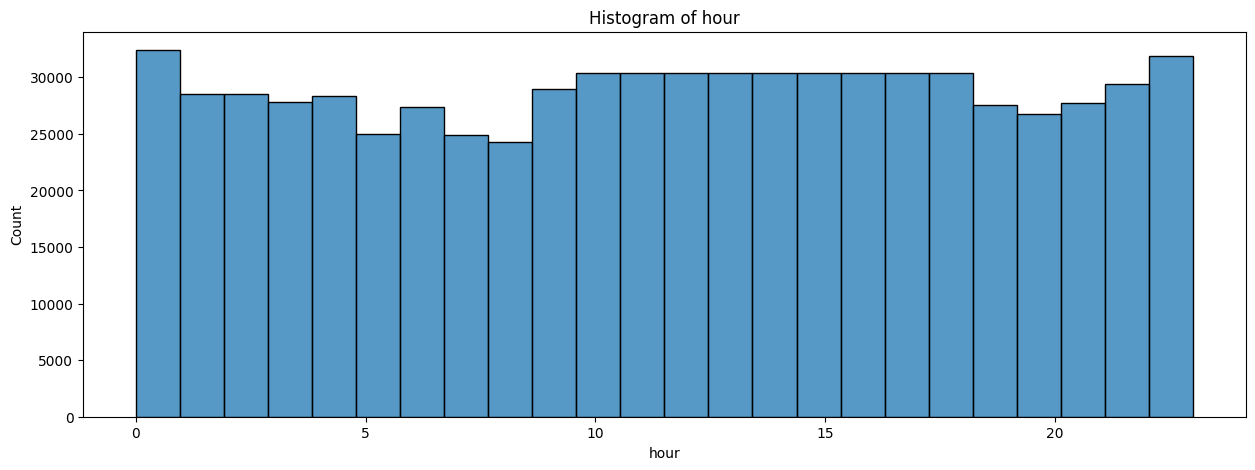

In [145]:
plt.figure(figsize=(15, 5))
sns.histplot(df['hour'], bins=24)
plt.title('Histogram of hour')

melihat histogram dari jam berapa aplikasi digunakan oleh konsumen. jadi, frekuensi persebaran waktu pemesanan pada datasheet diatas diketahui bahwa persebarannya hampir sama rata pada setiap waktu. dengan pemesanan tertinggi di puluk 12 malam. 

## hour skewness

In [146]:
df['hour'].skew()

-0.04543235623934958

melihat kemiringan dari data `waktu` pemesanan yang dilakukan oleh konsumen disetiap kali menggunakan aplikasi. `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai negatif atau kurang dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kek iri. bila diartikan dalam tabel berikut, maka kesimpulan yang didapatkan ialah "persebaran data `waktu penggunaan` pada datasheet yang diatas memiliki catatan bahwa terdapat konsumen yang memakai aplikasi berbasis `ride hailing` ini pada jam awal waktu yaitu mulai pukul 12 malam".

## correlation of distance, surge multiplier and price

In [147]:
df_new = df[['distance', 'surge_multiplier', 'price']]

mengelompokkan jarak, harga dan persentase kenaikan guna dilakukan pencarian korelasi satu sama lain.

In [148]:
df_new.corr()

,distance,surge_multiplier,price
distance,1.000000,0.024769,0.345061
surge_multiplier,0.024769,1.000000,0.240458
price,0.345061,0.240458,1.000000


melihat korelasi dari data yang telah kita kelompokkan diatas. sehingga, dari data tersebut dapat disimpulkan bahwa terdapat hubungan korelasi yang kurang signifikan pada jarak yang ditempuh dan persentase kenaikan dengan harga yang diperoleh. hubungan korelasi positif dapat diartikan sebagai "setiap bertambahnya `jarak` maupun `persentase kenaikan harga` maka akan bertambah pula `harga` yang ditampilkan. menurut smith (2018), Korelasi Pearson menghasilkan koefesien korelasi yang berfungsi untuk mengukur kekuatan hubungan linier antara dua variabel. 

# 5. Features Enginering

## select features

dari literatur yang telah saya temukan, saya pilih `features enginering` ini saja yang berefek pada kenaikan `harga` di setiap kali pemakaian aplikasi berbasis `ride hailing` tersebut.

https://medium.com/locale-ai/how-does-uber-do-price-surge-using-location-data-cfee03415022

https://www.ridester.com/uber-rates-cost/

https://www.tennessean.com/story/money/2016/05/29/surge-pricing-why-rainy-day-ride-cost-you-more/84922758/

https://www.uber.com/us/en/ride/ride-options/

https://help.lyft.com/hc/e/all/articles/115012927427-Lyft-ride-modes-overview

https://www.uber.com/en-gb/blog/uber-dynamic-pricing/

In [149]:
df_copy = df.copy()

menduplikat datasheet yang digunakan guna bila terjadi kesalahan dapat di kembalikan ke bentuk semula.

In [150]:
df_clean = df_copy.drop(['id', 'timestamp', 'day', 'month', 'datetime', 'timezone', 'product_id', 'latitude', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'windBearing', 'uvIndex', 'visibility.1', 'visibility.1', 'sunriseTime','sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMin', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'cloudCover', 'ozone', 'temperatureMinTime' ], axis=1)
df_clean

,hour,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...,...
693066,23,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693067,23,West End,North End,Uber,UberX,9.5,1.00,1.0,Partly Cloudy
693068,23,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy
693069,23,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


berdasarkan literasi yang telah disebutkan diatas, terdapat beberapa fitur yang dapat mempengaruhi biaya yang dikeluarkan untuk menggunakan aplikasi `ride hailing` tersebut. antara lain:
1. jam
2. titik awal
3. titik tujuan akhir
4. tipe aplikasi `ride hailing`
5. jenis produk yang dipakai pada aplikasi tersebut
6. biaya
7. jarak
8. persentase kenaikan
9. kondisi cuaca pada saat itu

## missing value

melakukan pencarian akan informasi data yang hilang pada datasheet diatas.

### how much data that missing in percentage

In [151]:
df_clean['price'].isnull().mean()

0.07949402009317949

terdapat hampir 8 persen data yang hilang pada kolom harga. 

### melihat kenapa ada data `harga` yang hilang pada datasheet tersebut.

In [152]:
missing_price = df_clean[df_clean.price.isnull()]
missing_price

,hour,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
18,14,North End,West End,Uber,Taxi,NaN,1.11,1.0,Partly Cloudy
31,23,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,Overcast
40,20,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,Partly Cloudy
60,20,North End,West End,Uber,Taxi,NaN,1.16,1.0,Mostly Cloudy
69,13,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,Clear
...,...,...,...,...,...,...,...,...,...
693025,15,South Station,Beacon Hill,Uber,Taxi,NaN,2.50,1.0,Mostly Cloudy
693047,1,Haymarket Square,Beacon Hill,Uber,Taxi,NaN,0.91,1.0,Mostly Cloudy
693049,1,North End,Beacon Hill,Uber,Taxi,NaN,1.79,1.0,Mostly Cloudy
693060,5,Theatre District,Haymarket Square,Uber,Taxi,NaN,1.61,1.0,Overcast


mencari tahu, kenapa harga hilang pada datasheet diatas.

In [153]:
missing_price['cab_type'].unique()

array(['Uber'], dtype=object)

setelah dilakukan pencarian, ternyata data harga yang hilang jatuh pada aplikasi `uber` dengan kategori `taksi`. saya beranggapan bahwa, transaksi taksi dilakukan dengan pembayaran tunai. hal ini menyebabkan tidak tercatatnya `biaya` pada datasheet tersebut.

## mengisi nilai yang kosong dengan menggunakan teknik `Arbitrary Value Imputation`

saya ingin mengimputasi data yang hilang diatas.

### mencari tahu nilai imputasi pada beberapa literatur

pada literatur dibawah ini, diketahui rata-rata biaya yang dikeluarkan untuk memesan taksi berkisar di angka 40% lebih tinggi ketimbang `harga` pada aplikasi `ride hailing`.

https://techboomers.com/t/uber-cost

saya ingin mencari berapa rata-rata biaya yang dikeluarkan konsumen setiap kali menggunakan aplikasi tersebut.

In [154]:
uber_avg_price = df_clean['price'].mean()
uber_avg_price

16.545125490614065

ternyata, rata-rata `biaya` yang dikeluarkan konsumen memiliki rata-rata sebesar 16.5$.

dengan literatur yang telah saya dapat, maka harga rata-rata taksi dapat saya simpulkan dengan harga 140% dari rata-rata biaya yang dikeluarkan dengan aplikasi ride hailing tersebut.

In [155]:
taxi_avg_price = uber_avg_price + (uber_avg_price * 0.4)
taxi_avg_price

23.16317568685969

ternyata, rata-rata biaya yang dikeluarkan konsumen dengan menggunakan taksi ialah sebesar 23.2$

### mengisi data yang kosong tersebut dengan nilai yang telah saya cari

saya ingin mengisi data kosong tersebut dengan data yang telah saya dapatkan diatas.

In [156]:
df_clean.isnull().mean()

hour                0.000000
source              0.000000
destination         0.000000
cab_type            0.000000
name                0.000000
price               0.079494
distance            0.000000
surge_multiplier    0.000000
short_summary       0.000000
dtype: float64

mencari persentase data `biaya` yang hilang.

In [157]:
df_fill = df_clean.fillna(taxi_avg_price)
df_fill.isnull().mean()

hour                0.0
source              0.0
destination         0.0
cab_type            0.0
name                0.0
price               0.0
distance            0.0
surge_multiplier    0.0
short_summary       0.0
dtype: float64

setelah dilakukan pengisian data kosong, saya coba cek kembali apakah terdapat data kosong lainnya. setelah dilakukan pengecekan data, ternyata data sudah terisi semua.

## pecah data bagian satu

membagi data bagian pertama. hal ini digunakan untuk memisahkan data latihan dengan data tes.

### split train-set and test-set

saya membagi data tes dengan data latihan.

In [158]:
train, test = train_test_split(df_fill, test_size=0.2, random_state=1)

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)
train

Train Size :  (554456, 9)
Test Size  :  (138615, 9)


,hour,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
424231,11,Back Bay,South Station,Uber,Black SUV,30.500000,1.68,1.0,Mostly Cloudy
462379,10,South Station,West End,Lyft,Lux,16.500000,2.03,1.0,Possible Drizzle
517429,17,North Station,North End,Lyft,Lyft,7.000000,1.02,1.0,Overcast
23107,2,Haymarket Square,North Station,Uber,UberXL,10.500000,0.49,1.0,Mostly Cloudy
354648,4,West End,Boston University,Uber,Taxi,23.163176,2.80,1.0,Clear
...,...,...,...,...,...,...,...,...,...
371403,19,South Station,Financial District,Lyft,Lux Black,16.500000,0.56,1.0,Mostly Cloudy
491263,13,Beacon Hill,Fenway,Lyft,Lyft XL,13.500000,2.35,1.0,Partly Cloudy
470924,20,Fenway,West End,Lyft,Shared,5.000000,2.82,1.0,Possible Drizzle
491755,2,South Station,Beacon Hill,Uber,WAV,11.000000,2.60,1.0,Mostly Cloudy


saya menggunakan 20% data sebagai nilai yang akan di tes di langkah selanjutnya. hal ini mengacu pada literatur yang telah saya temukan.

https://en.wikipedia.org/wiki/Pareto_principle accesed on march 4 2023

## outlier data latihan

mencari data yang terlalu mencolok perbedaanya.

Text(0.5, 1.0, 'Boxplot')

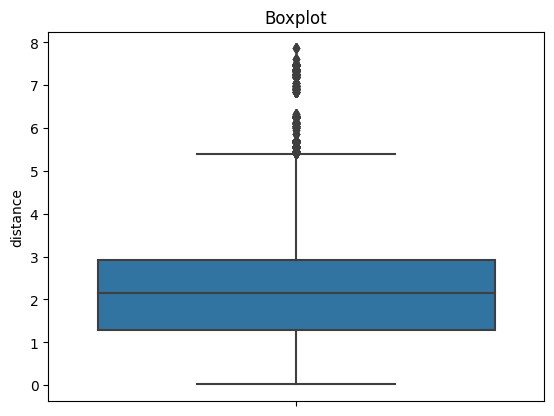

In [159]:
sns.boxplot(y=train['distance'])
plt.title('Boxplot')

melihat `boxplot` dari data jarak. Boxplot atau Box-Plot merupakan visualisasi data berbentuk box (kotak berbentuk bujur sangkar). Boxplot dapat digunakan untuk menunjukkan perbedaan antara populasi tanpa menggunakan asumsi distribusi statistik yang mendasarinya. dari tabel diatas, diketahui terdapat banyak data `jarak` yang bertepatan pada nilai yang telah ditentukan.

In [160]:
train['distance'].skew()

0.8339868275969082

dikarenakan data `jarak` pada datasheet diatas memiliki nilai yang lebih besar dari 0. maka akan saya coba untuk mengatasi nilai yang ekstrim tersebut dengan menghilangkan datanya agar terlihat lebih homogen.

In [161]:
IQR = train['distance'].quantile(0.75) - train['distance'].quantile(0.25)

lower_boundary = train['distance'].quantile(0.25) - (IQR * 1.5)
upper_boundary = train['distance'].quantile(0.75) + (IQR * 1.5)

In [162]:
print(lower_boundary)
print(upper_boundary)

-1.195
5.405


dari proses diatas, terlihat bahwa nilai terbesar ditutup di angka 5,4 mil. sehingga nilai yang berada diatas 5,4 mil akan dihapuskan guna menghomogenkan data.

In [163]:
outliers_distance = np.where(train['distance'] > upper_boundary, True,
                    np.where(train['distance'] < lower_boundary, True, False))
outliers_distance

array([False, False, False, ..., False, False, False])

In [164]:
train_trimmed = train.loc[~(outliers_distance)]

print('Size dataset - Before trimming : ', train.shape)
print('Size dataset - After trimming  : ', train_trimmed.shape)

a = train['distance'].count() - train_trimmed['distance'].count()
b = a/train['distance'].count()
print('percentage data losing  : ', b * 100)

Size dataset - Before trimming :  (554456, 9)
Size dataset - After trimming  :  (547830, 9)
percentage data losing  :  1.195045233526195


setelah mengatasi data yang ekstrim tersebut, didapatkan 1,2 persen data yang dihapus guna membuat datasheet semakin baik persebarannya.

Text(0.5, 1.0, 'Boxplot')

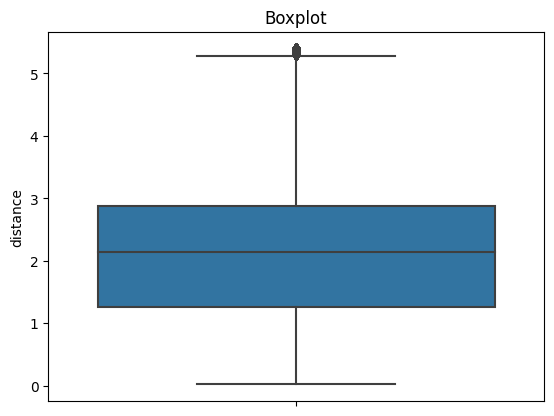

In [165]:
sns.boxplot(y=train_trimmed['distance'])
plt.title('Boxplot')

setelah dilakukan `trimming` pada data latihan, terlihat pada `boxplot` bahwa persebaran datanya nya semakin baik.

## Memisahkan data bagian kedua.

### membagi data input sebagai `y` dan data output sebagai `X`

saya ingin memisahkan data tes yang digunakan untuk `input` dan `output`

In [166]:
X_train = train_trimmed.drop(['price'], axis=1)
X_test = test.drop(['price'], axis=1)

y_train = train_trimmed['price']
y_test = test['price']
y_test

541064    16.5
215250    13.5
454530     7.0
150598    10.0
592364    22.5
          ... 
493955    13.5
96764      7.0
653443    26.5
194915    27.5
120144    27.5
Name: price, Length: 138615, dtype: float64

data `biaya` akan saya jadikan `output`, dan sisanya akan saya jadikan sebagai `input` nya

### memisahkan data `latihan` menjadi 2, yaitu `data numerik` dan `data ketegori`

saya ingin membagi data inputnya menjadi `data angka` dan `data kategori`

In [167]:
X_train_num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
X_train_cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

X_test_num_columns = X_test.select_dtypes(include=np.number).columns.tolist()
X_test_cat_columns = X_test.select_dtypes(include=['object']).columns.tolist()

saya cek apa saja data yang tertulis sebagai `number` dan data apa saja yang tertulis sebagai `string`

In [168]:
X_train_num_columns

['hour', 'distance', 'surge_multiplier']

data `number` terdiri dari `jam`, `jarak`, dan `persentase kenaikan`

In [169]:
X_train_cat_columns

['source', 'destination', 'cab_type', 'name', 'short_summary']

data `kategori` terdiri dari `tempat pengambilan`, `tujuan`, `aplikasi ride hailing`, `nama produk ride hailing`, dan `ringkasan singkat`

melepas kolom `waktu` dari kolom `data numerik` dan menggabungkannya di `data kategori`

In [170]:
X_num = ['distance', 'surge_multiplier']
X_cat = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'hour']

saya ingin membuat data angka beranggotakan `jarak` dan `persentase kenaikan` saja, sisanya akan saya jadikan data kategori.

In [171]:
X_train_num = train_trimmed[['distance', 'surge_multiplier']]
X_test_num = test[['distance', 'surge_multiplier']]

X_train_cat = train_trimmed[['source', 'destination', 'cab_type', 'name', 'short_summary', 'hour']]
X_test_cat = test[['source', 'destination', 'cab_type', 'name', 'short_summary', 'hour']]


mengelompokkan data berdasarkan data kelompok yang saya inginkan diatas.

In [172]:
X_train_num

,distance,surge_multiplier
424231,1.68,1.0
462379,2.03,1.0
517429,1.02,1.0
23107,0.49,1.0
354648,2.80,1.0
...,...,...
371403,0.56,1.0
491263,2.35,1.0
470924,2.82,1.0
491755,2.60,1.0


In [173]:
X_train_cat

,source,destination,cab_type,name,short_summary,hour
424231,Back Bay,South Station,Uber,Black SUV,Mostly Cloudy,11
462379,South Station,West End,Lyft,Lux,Possible Drizzle,10
517429,North Station,North End,Lyft,Lyft,Overcast,17
23107,Haymarket Square,North Station,Uber,UberXL,Mostly Cloudy,2
354648,West End,Boston University,Uber,Taxi,Clear,4
...,...,...,...,...,...,...
371403,South Station,Financial District,Lyft,Lux Black,Mostly Cloudy,19
491263,Beacon Hill,Fenway,Lyft,Lyft XL,Partly Cloudy,13
470924,Fenway,West End,Lyft,Shared,Possible Drizzle,20
491755,South Station,Beacon Hill,Uber,WAV,Mostly Cloudy,2


melihat kembali data yang telah saya pisahkan. 

## encoding

melakukan `encoding` pada `data kategori` guna dapat dihitung dengan `maching learning`

In [174]:
encoder = OneHotEncoder()

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_test_cat_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

saya menggunakan metode `onehotencoder` dikarenakan tidak adanya ranking pada setiap kolom kategorinya.

## Scalling

saya melakukan `scalling` pada `data numerikal`, sehingga data yang didapat memberikan efek yang sama pada `output` yang akan dihasilkan nantinya. disini saya `scalling` dengan menggunakan metode `min max scaller` karena persebaran data-nya yang agak ekstrim yang dilihat pada nilai `skewness` diatas. bila persebaran datanya normal, maka perlu dilakukan `scalling` dengan metode `Standard Scaler`.

In [175]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled

array([[0.27509294, 0.        ],
       [0.44423792, 0.        ],
       [0.19516729, 0.        ],
       ...,
       [0.28810409, 0.        ],
       [0.06877323, 0.        ],
       [0.21189591, 0.        ]])

saya melakukan `scalling` data pada `data latihan `saja agar hasil output dari `data tes` tidak bocor.

## concate

menggabungkan semua `data kategori` dan `data numerikal` pada `data latihan` dan `data tes`

In [176]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.30855019, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37360595, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18587361, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5204461 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4795539 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26394052, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [177]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.308550,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.373606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.185874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.087361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.516729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547825,0.100372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
547826,0.433086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547827,0.520446,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
547828,0.479554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


melihat data yang telah digabungkan tadi.

# 6. model definition

menentukan definisi `model` yang digunakan pada `maching learing` kali ini

dengan melihat bahwa, adanya korelasi pada data harga dan jarak. maka, saya tentukan untuk `model` kali ini akan saya gunakan `linear regression`

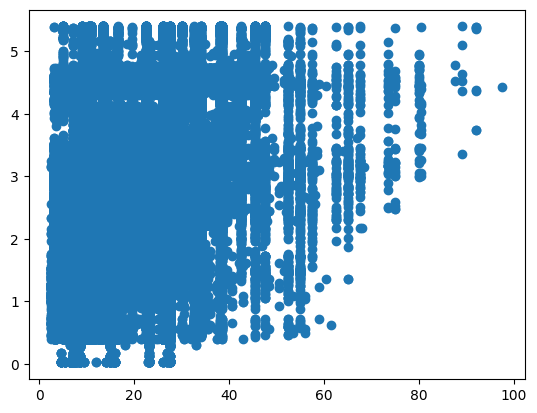

In [178]:
price = train_trimmed['price']
distance = train_trimmed['distance']
plt.scatter(price, distance)

In [179]:
price

424231    30.500000
462379    16.500000
517429     7.000000
23107     10.500000
354648    23.163176
            ...    
371403    16.500000
491263    13.500000
470924     5.000000
491755    11.000000
128037     8.500000
Name: price, Length: 547830, dtype: float64

In [180]:
model_lin_reg = LinearRegression()

melakukan pemanggilan fungsi `linearRegression()` pada library `sklearn`.

# 7. model training

saya coba melakukan pelatihan pada komputer dengan data yang telah saya sediakan.

In [181]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8. model evaluation

saya mencoba mengevaluasi model dengan melihat hasil yang didapatkan pada tes yang dilakukan.

In [182]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([28.81030273, 16.70239258,  5.7097168 , ...,  7.51660156,
       10.80517578,  7.63964844])

In [183]:
y_train

424231    30.500000
462379    16.500000
517429     7.000000
23107     10.500000
354648    23.163176
            ...    
371403    16.500000
491263    13.500000
470924     5.000000
491755    11.000000
128037     8.500000
Name: price, Length: 547830, dtype: float64

In [184]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.7468039269687015
MAE test =  1.804433562912332
MSE train =  5.995598375200024
MSE test =  6.6102447678456135
RMSE train =  2.448591100041006
RMSE test =  2.571039627824825
r2score train =  0.9264832203155968
r2score test =  0.9207149406410006


dari hasil diatas, didapat nilai MAE test sebesar kurang lebih 1,8 dari hasil yang sesungguhnya pada data tes. MAE (Mean Absolute Error) adalah rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan). hal ini membuat MAE menjadi salah satu tolak ukur apakah model yang kita gunakan itu memiliki prediksi yang akurat. R2(square) score yang didapat berkisar di 0,92. Nilai R-squared (R2) digunakan untuk menilai seberapa besar pengaruh variabel laten independen tertentu terhadap variabel laten dependen. Terdapat tiga kategori pengelompokan pada nilai R square yaitu kategori kuat, kategori moderat, dan kategori lemah. nilai R square 0,75 termasuk ke dalam kategori kuat, nilai R square 0,50 termasuk kategori moderat dan nilai R square 0,25 termasuk kategori lemah (Hair et al., 2011). sehingga dalam data tersebut 92% yakini bahwa nilai yang didapat itu benar. nilai RMSE yang didapat bernilai 2,5. Root Mean Square Error (RMSE) yang lebih kecil dikatakan lebih akurat daripada metode estimasi yang mempunyai Root Mean Square Error (RMSE) lebih besar. sehingga bila ditarik kesimpulan, metode yang digunakan sudah dirasa `good fit`.

# 9. model saving

menyimpan data yang telah diproses oleh `machine learning`

In [185]:
with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(X_num, file_4)

with open('list_cat_cols.txt','w') as file_5: 
  json.dump(X_cat, file_5)

# Pertanyaan konseptual

Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Regresi linear adalah teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui (anon, 2023). sehingga saya mengasumsikan dikarenakan untuk menentukan hasil output yang diinginkan, diperlukan input yang disinyalir memiliki korelasi pada output tersebut. dikarenakan data `harga` pada datasheet itu memiliki dependensi pada tiap data yang ada yang telah saya tentukan, maka hasil dari data `harga` dapat ditemukan. `linera regression` hanya berlaku pada data yang bersifat numerikal.


Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

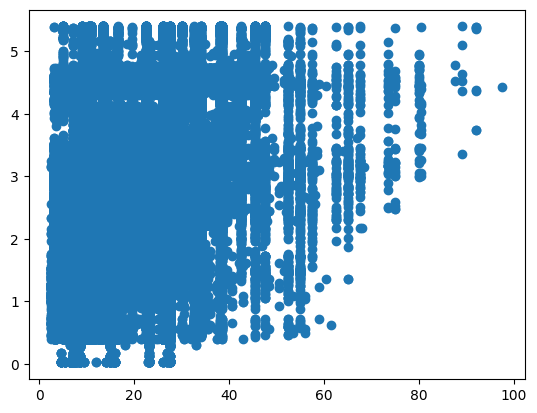

In [186]:
plt.scatter(price, distance);

In [187]:
moDel_price = np.array(price).reshape(-1, 1)
moDel_distance = np.array(distance)

lm = LinearRegression()
lm.fit(moDel_price, moDel_distance)

print('model intercept : ',lm.intercept_)
print('model slope : ',lm.coef_[0])

model intercept :  1.523196393769629
model slope :  0.036423227386625345


dengan data yang telah dicari pada kolom `harga` dan `jarak`, dapat disampaikan bahwa intercept merupakan bilangan independen yang tidak dapat berubah walaupun nilai dari bilangan slope di bagian ke 0, sementara slope merupakan bilangan yang dependen sehingga nilainya dapat berubah-ubah seiring bertambahnya nilai bilangan pengalinya. bila dilihat dari model biasanya menunjukkan rumus seperti ini:

y = a x + b

dimana x merupakan nilai dari slope yang selalu berubah seiring bertambahnya indexnya, sementara b merupakan intercept yang nilainya tetap.

bila dilihat dari hasil intercept dan slope pada data `harga` dan `jarak`, maka dihasilkan nilai intercept sebesar 1,52 dan nilai slope sebesar 0,03.

# 11. Kesimpulan

dengan uji yang telah dilakukan, maka didapatkan beberapa nilai setelah dilakukan EDA ternyata memiliki persebaran data yang miring ke kanan dengan tingkat ekstrim. terdapat pula kolom kosong pada `harga` di kategori `taksi` sehingga perlu dilakukan pengisian berdasarkan literatur yang didapatkan. outlier di *handling* dengan menghilangkan titik atas yang sangat ekstrim sehingga membuat persebaran data lebih baik. model evaluasi yang digunakan ialah dengan menggunakan *MAE* agar mempermudah client memperkirakan `harga` yang akan muncul. dengan model analisis menggunakan `linear regression` karena ada korelasi antara data yang diperoleh dengan bentuk numerik. untuk memperbaiki model, diperlukan data `harga` pada kategori `taksi` sehingga data yang didapat lebih nyata.

# referensi


anon, 2023, Apa itu regresi linier?. diakses pada https://aws.amazon.com/id/what-is/linear-regression/ 6 maret 2023 pukul 19.00